# Week 1 - Visualising Data Exercises

### Exercise 1. ###

The purpose of this exercise is to make sure that you are familiar with the display options in matplotlib and can make professional looking plots. The assignments at the end of two weeks will be assessed based on the plots' presentation. 

<div style="background-color:#C2F5DD">

Create a graph of a $y=\sin^2(x)$ going from $-2\pi$ to $+2\pi$ (and no further). Make sure that the axes are labelled as $x$ and $y$ and that the equation is written as legend on this graph. Change the $x-axis$ tick marks to be multiples of $\frac{\pi}{4}$ and labelled appropriately. Add a grid to this plot and finally add a graph of $y=\cos^{100}(x)$ as a dotted red line with appropriate legend. Make sure that your plot is a decent size to be easily readable and save the complete plot to a file.

</div>



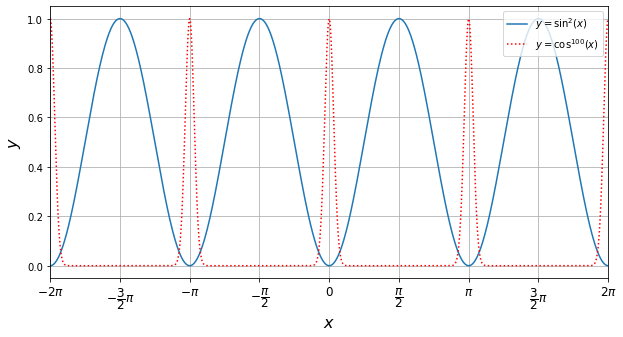

In [4]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size

x=np.arange(-2*np.pi,2*np.pi,0.01)
y=np.sin(x)**2
y2=np.cos(x)**100

pl.plot(x,y,label="$y=\sin^2(x)$")
pl.plot(x,y2,"r:",label="$y=\cos^{100}(x)$")
xticks_loc=np.arange(-2*np.pi,2*np.pi+0.001,np.pi/2) # need the +2 pi point
xticks_labels=["$-2\pi$","$-\dfrac{3}{2}\pi$","$-\pi$","$-\dfrac{\pi}{2}$",
               "0","$\dfrac{\pi}{2}$","$\pi$","$\dfrac{3}{2}\pi$","$2\pi$"] # if \frac causes problems use \dfrac

#xticks_labels=["$-2\pi$","$-3\pi/2$","$-\pi$","$-\pi/2$",
#               "0","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"] # alternative choice

pl.xticks(xticks_loc,xticks_labels,fontsize=12)
pl.xlim([-2*np.pi,2*np.pi])
pl.xlabel("$x$",fontsize=16)
pl.ylabel("$y$",fontsize=16)
pl.grid()
pl.legend(loc="upper right")
pl.savefig("trig_plots.png")

pl.show()


<div style="background-color:#C2F5DD">

### Exercise 2 ###

The purpose of this exercise is to make sure that you are familiar with all these plotting options. Pick 6 different functions of x (the actual functions don't matter for this exercise). Plot them in different configurations, orientatios etc. Draw some so that they have a shared $x-axis$ and $y-axis$ for example. This exercise will seem trivial after reading through the examples above but do try to do a good and detailed job of it. Practicing now will save you time later as you wont have to look it up later.

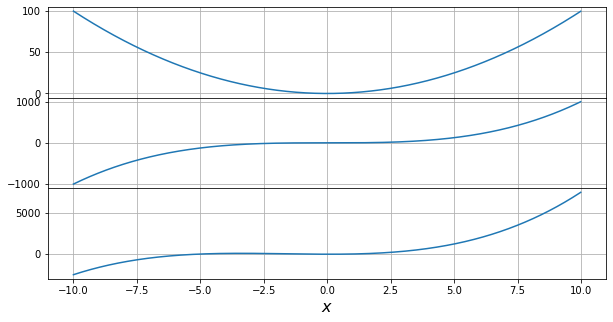

In [6]:
# example plots, you may expand upon this or create your own

import numpy as np
import scipy as sp
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*x
y3=5*x*x*x+25*x*x-4*x-13

fig=pl.figure()
fig.subplots_adjust(hspace=0)

pl.subplot(3,1,1)
pl.plot(x,y1)
pl.grid()
pl.subplot(3,1,2)
pl.plot(x,y2)
pl.grid()
pl.subplot(3,1,3)
pl.plot(x,y3)
pl.grid()
pl.xlabel("$x$", fontsize=16)

pl.show()



# Fitting Data

<div style="background-color:#C2F5DD">

## Exercise 1 ###

Choose a mathematical function characterised by varying scales of structure, such as $y=\cos(x^2)$ within the range $0 \le x \lt 10$, and examine the effectiveness of cubic spline interpolation across different sampling intervals.

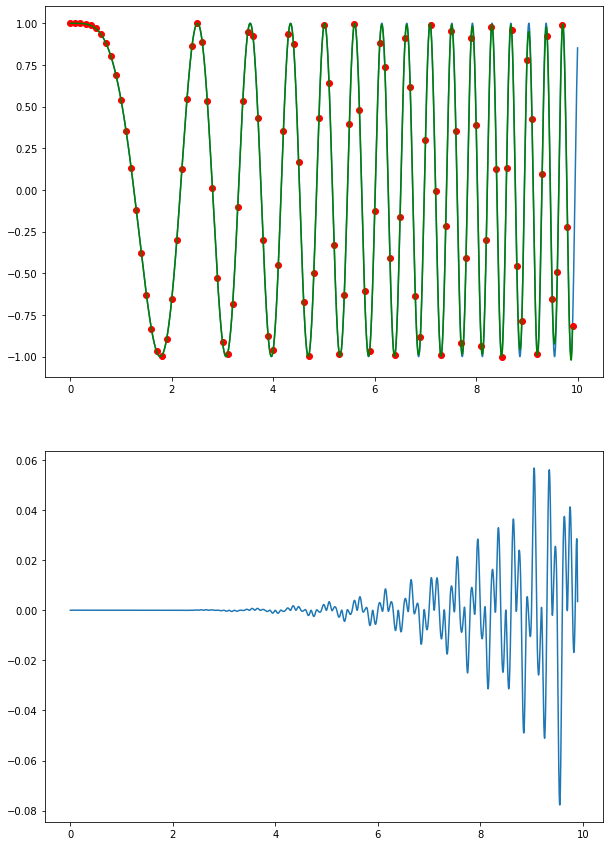

In [8]:
import numpy as np
import pylab as pl
import scipy.interpolate as spi


pl.rcParams['figure.figsize'] = [10, 15] 


x=np.arange(0,10,.001)
y=np.cos(x**2)

pl.subplot(2,1,1)
pl.plot(x,y)

# now pick the spacing
spacing=0.1
xx=np.arange(0,10,spacing)
yy=np.cos(xx**2)

pl.plot(xx,yy,'ro')

f=spi.interp1d(xx, yy, kind='cubic')
#f=spi.CubicSpline(xx, yy)
xr=np.arange(0,xx[-1],0.001) # needed to avoid going past the end
yr=np.cos(xr**2)
pl.plot(xr,f(xr),"g-")

pl.subplot(2,1,2)
pl.plot(xr,yr-f(xr))


pl.show()

<div style="background-color:#C2F5DD">

## Exercise 2 ##

Fit the following data set

Fit value 0.000 +/- 0.000
Fit value -0.000 +/- 0.000
Fit value 0.001 +/- 0.000
Fit value -0.003 +/- 0.000
Fit value -0.010 +/- 0.000
Fit value 0.193 +/- 0.001
Fit value -1.057 +/- 0.006
Fit value 2.203 +/- 0.055
Fit value -8.088 +/- 0.440
Fit value 15.002 +/- 1.026
True Values 0.09 -1 2.3 -7 13.6
True function  y=0.09x^4 - x^3 + 2.3x^2 - 7x + 13.6


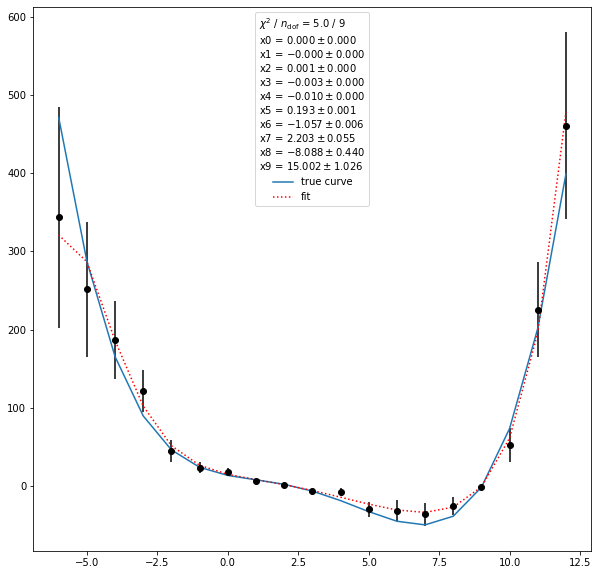

In [25]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as pl
import iminuit
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit
# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares


pl.rcParams['figure.figsize'] = [10, 10] 


# first generate the data
def func(x):
    return .09*x**4-x**3+2.3*x**2-7*x+13.6

def line_np(x, par):
    return np.polyval(par, x)  # for len(par) == 2, this is a line

x=np.arange(-6,13)
y=func(x)

y_err=0.3*y
y_measured=y+y_err*npr.normal(size=len(y))



#print("x=",x)
#print("y_measured=",y_measured)
#print("y_err=",y_err)

# now perform the fit
# first import the data in the exercise


y_measured= [343.39452514, 251.31914561, 186.7806368,  121.30027965,  45.23336652,
  23.49470302,  18.46581766,   6.58329486 ,  1.98522328,  -6.74799454,
  -7.55489379, -29.55544088, -31.32898172, -36.27525348, -25.23860169,
  -1.09156819,  52.32898397, 225.38126087, 460.67437131]
y_err= [141.312,  86.205,  49.632,  26.877,  13.872,   7.197,   4.08,    2.397,   0.672,
  -1.923,  -5.568,  -9.795, -13.488, -14.883, -11.568,  -0.483,  22.08,   60.477,
 119.712]

pl.errorbar(x,y_measured,y_err,fmt="ok")

pl.plot(x,y,label="true curve")

least_squares_np = LeastSquares(x, y_measured, y_err, line_np)

initial_guess=[1,4,7,6,7,5,5,5,5,5]

m=Minuit(least_squares_np, initial_guess)  # pass starting values as a sequence
m.migrad()
m.hesse()
m.minos()



for i in range(len(initial_guess)):
    print("Fit value",'{:.3f}'.format(m.values[i]), "+/-",'{:.3f}'.format(m.errors[i]),)

print("True Values",.09,-1,2.3,-7,13.6)
pl.plot(x, line_np(x, m.values), "r:",label="fit")
# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x) - m.nfit}",
]

# try printing out the parameters, values and errors to see the format

for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

print("True function ","y=0.09x^4 - x^3 + 2.3x^2 - 7x + 13.6")    

pl.legend(title="\n".join(fit_info))

#print(m)


pl.show()

<div style="background-color:#C2F5DD">

## Exercise 3


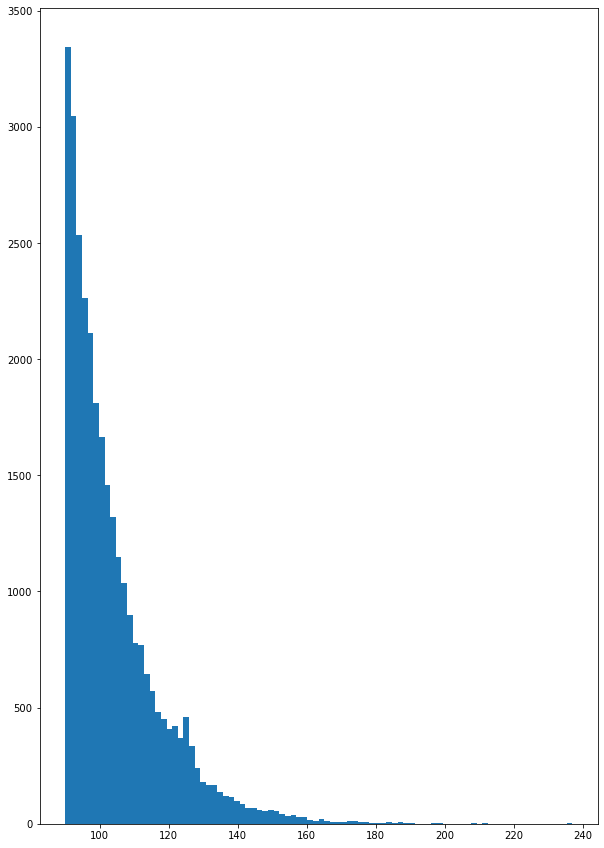

In [10]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as pl
import pickle as pk

x=90+npr.exponential(14,size=30000)
x=np.append(x,npr.normal(scale=1.5,loc=125,size=350))

pl.hist(x,bins=90);

outfile=open("data1","wb")
pk.dump(x,outfile)
outfile.close()

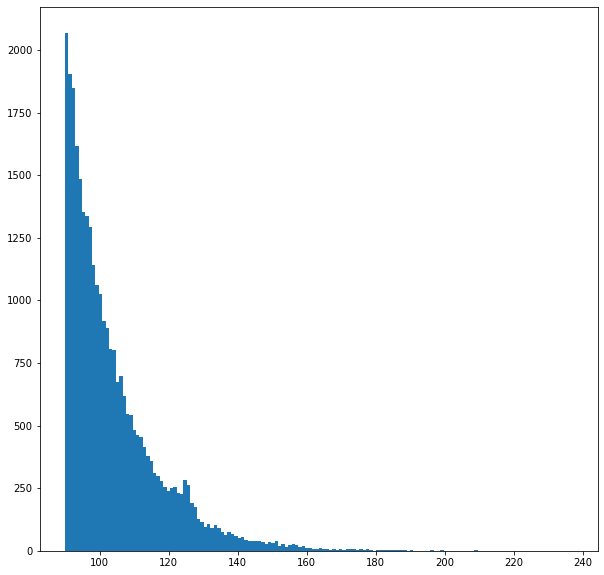

In [11]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as pl
pl.rcParams['figure.figsize'] = [10, 10] 
infile=open("data1","rb")
x=pk.load(infile)
n,bins,patches=pl.hist(x,bins=150);

In [12]:
print(n)

[2.068e+03 1.903e+03 1.849e+03 1.617e+03 1.484e+03 1.355e+03 1.336e+03
 1.294e+03 1.142e+03 1.062e+03 1.026e+03 9.180e+02 8.900e+02 8.050e+02
 8.030e+02 6.750e+02 6.990e+02 6.200e+02 5.470e+02 5.430e+02 4.810e+02
 4.640e+02 4.540e+02 4.140e+02 3.800e+02 3.580e+02 3.090e+02 3.000e+02
 2.800e+02 2.550e+02 2.390e+02 2.510e+02 2.560e+02 2.310e+02 2.250e+02
 2.830e+02 2.610e+02 1.900e+02 1.730e+02 1.260e+02 1.170e+02 9.600e+01
 1.060e+02 9.200e+01 1.050e+02 9.000e+01 7.700e+01 6.500e+01 7.600e+01
 6.700e+01 6.000e+01 5.000e+01 5.700e+01 4.300e+01 4.100e+01 4.000e+01
 3.900e+01 3.900e+01 3.400e+01 2.900e+01 3.700e+01 3.300e+01 3.900e+01
 1.900e+01 2.700e+01 1.500e+01 2.200e+01 2.600e+01 2.200e+01 1.400e+01
 1.800e+01 1.300e+01 1.000e+01 6.000e+00 9.000e+00 1.300e+01 8.000e+00
 7.000e+00 5.000e+00 7.000e+00 4.000e+00 7.000e+00 5.000e+00 7.000e+00
 7.000e+00 8.000e+00 5.000e+00 7.000e+00 2.000e+00 6.000e+00 2.000e+00
 1.000e+00 4.000e+00 3.000e+00 3.000e+00 5.000e+00 4.000e+00 2.000e+00
 2.000

In [13]:
len(bins)

151

In [14]:
bin_centres=[]
for i in range(len(bins)-1):
    bin_centres.append((bins[i]+bins[i+1])/2)
bin_centres=np.array(bin_centres)
    
len(bin_centres)

150

<ErrorbarContainer object of 3 artists>

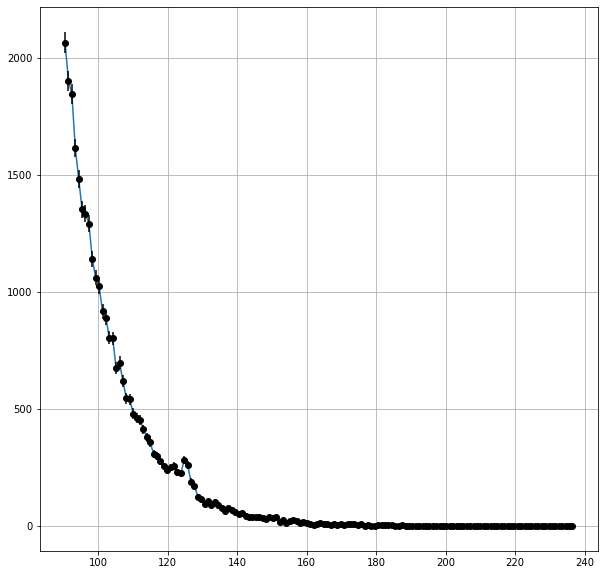

In [15]:
pl.plot(bin_centres,n)
n_err=np.sqrt(n)
pl.grid()
pl.errorbar(bin_centres,n,n_err,fmt="ok")


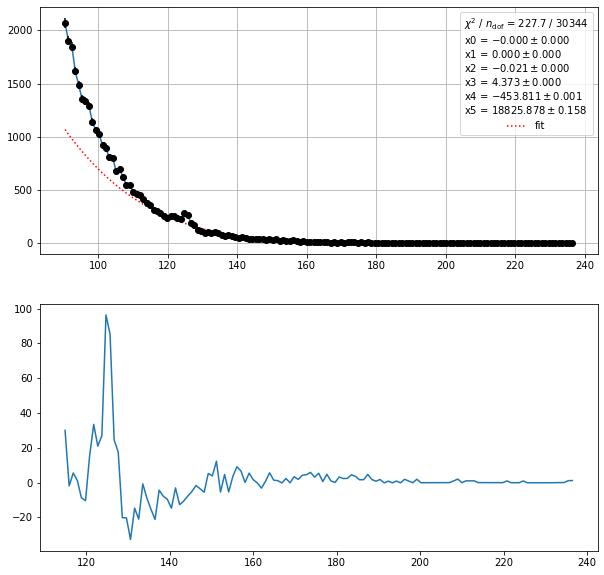

In [17]:
from iminuit import cost, Minuit

def line_np(x, par):
    return np.polyval(par, x)  # for len(par) == 2, this is a line


pl.subplot(2,1,1)
pl.plot(bin_centres,n)
n_err=np.sqrt(n)
pl.grid()
pl.errorbar(bin_centres,n,n_err,fmt="ok")

# first try a polynomial - could have to someho remove the fact that the data start at 90
bin_c=[x-90 for x in  bin_centres]
n_err_effect=[x  if x>0 else 0.1 for x in n_err] # errors of 0 really scre up a least squares fit
c=cost.LeastSquares(bin_centres[25:], n[25:], n_err_effect[25:], line_np)


params=[1,1,-1,1,-6.5,3]
m=Minuit(c,params)
m.migrad()
m.hesse()


pl.plot(bin_centres, line_np(bin_centres, m.values), "r:",label="fit")
# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x) - m.nfit}",
]

# try printing out the parameters, values and errors to see the format

for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")



pl.legend(title="\n".join(fit_info))

# not a dreadful fit but can see that it doesn't work so well below ~95
# but lets see what subtracting it does anyway and ignore  below ~95

subtracted=[n[i]-line_np(bin_centres[i],m.values) for i in range(len(n))]

pl.subplot(2,1,2)
pl.plot(bin_centres[25:], subtracted[25:])
pl.show()

# maybe a hint of something just above 120 but quality of fit below that means that it is hard to tell. 
#If we had good reason to keep going with a polynomial the next step would be to try a sliding window


2068.0 0.001
ff  0.10021020474147395
90.0 2000.0 10.0 <class 'numpy.ndarray'> <class 'numpy.ndarray'>


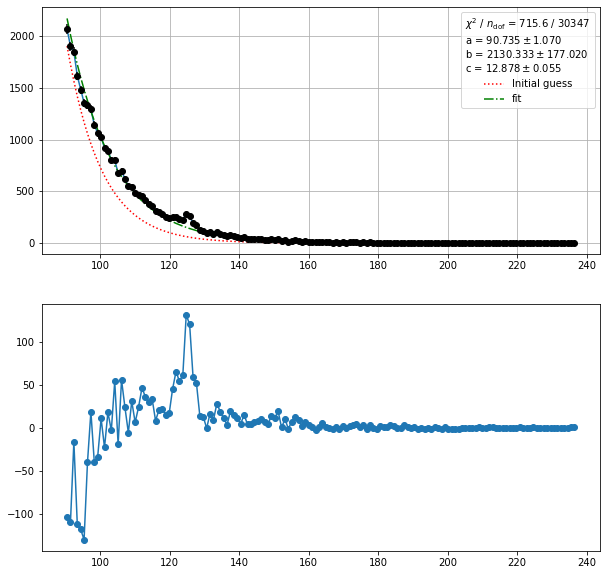

In [18]:
# OK so lets try an expontential.
from scipy.stats import expon
from iminuit import cost, Minuit
import numpy as np

def ff(x,a,b,c):
    return b*np.exp(-(x-a)/c)

pl.subplot(2,1,1)
pl.plot(bin_centres,n)
n_err=np.sqrt(n)
pl.grid()
pl.errorbar(bin_centres,n,n_err,fmt="ok")

# log liklyhood don't work if you have a zero 
nn=np.array([x if x>0 else 0.001 for x in n])
print(nn.max(),nn.min())
#cc = cost.BinnedNLL(nn, bins, ff)
cc=cost.LeastSquares(bin_centres, n, n_err_effect, ff)


print("ff ",ff(200,90,6000,10))

#cc.mask=(bin_centres>140)

m=Minuit(cc,a=90,b=2000,c=10)
a=m.values[0]
b=m.values[1]
c=m.values[2]

print(a,b,c,type(bin_centres), type(bins))

pl.plot(bin_centres, ff(bin_centres, a,b,c), "r:",label="Initial guess")

m.migrad()

m.hesse()

a=m.values[0]
b=m.values[1]
c=m.values[2]


pl.plot(bin_centres, ff(bin_centres, a,b,c), "g-.",label="fit")
# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x) - m.nfit}",
]

# try printing out the parameters, values and errors to see the format

for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")



pl.legend(title="\n".join(fit_info))

# looks good so now do the subtraction
subtracted=[n[i]-ff(bin_centres[i],a,b,c) for i in range(len(n))]

pl.subplot(2,1,2)
pl.plot(bin_centres, subtracted,"o-")


# so now definitely looking like something between 120 and 130
# so lets try masking it to see if that changes the fit or 
# probably would simply move to puting in a signal term as well


pl.show()

2068.0 0.001
90.0 3000.0 10.0 <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> 150


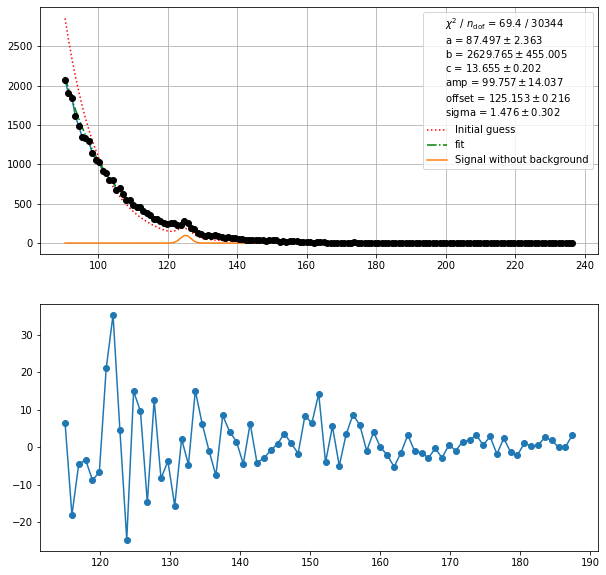

In [19]:
# OK so lets try an expontential.
from scipy.stats import expon
from iminuit import cost, Minuit
import numpy as np

def gaus(x,amp, offset, sigma):
    return amp*np.exp(-(x-offset)**2/(2*sigma**2))


def ff(x,a,b,c,amp,offset,sigma):
    #Only add signla in the signal region as it may be distorted by other data
    return b*np.exp(-(x-a)/c)+gaus(x,amp,offset,sigma)
    return r
  

pl.subplot(2,1,1)
pl.plot(bin_centres,n)
n_err=np.sqrt(n)
pl.grid()
pl.errorbar(bin_centres,n,n_err,fmt="ok")

# log liklyhood don't work if you have a zero 
nn=np.array([x if x>0 else 0.001 for x in n])
print(nn.max(),nn.min())
#cc = cost.BinnedNLL(nn, bins, ff)
cc=cost.LeastSquares(bin_centres[25:100], n[25:100], n_err_effect[25:100], ff)


#cc.mask=(bin_centres<120 | bin_centres>130)

m=Minuit(cc,a=90,b=3000,c=10,amp=100,offset=125,sigma=2)
a=m.values[0]
b=m.values[1]
c=m.values[2]
amp=m.values[3]
offset=m.values[4]
sigma=m.values[5]



print(a,b,c,type(bin_centres), type(bins))

pl.plot(bin_centres, ff(bin_centres, a,b,c,amp,offset,sigma), "r:",label="Initial guess")

#m.limits["offset"]=(120,130)
#m.limits["sigma"]=(0,5)

m.migrad()

m.hesse()

a=m.values[0]
b=m.values[1]
c=m.values[2]
amp=m.values[3]
offset=m.values[4]
sigma=m.values[5]


pl.plot(bin_centres, ff(bin_centres, a,b,c,amp,offset,sigma), "g-.",label="fit")
pl.plot(bin_centres,gaus(bin_centres,amp,offset,sigma),label="Signal without background")
# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x) - m.nfit}",
]

# try printing out the parameters, values and errors to see the format

for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")



pl.legend(title="\n".join(fit_info))

# looks good so now do the subtraction
print(type(bin_centres),len(bin_centres))
subtracted=n-ff(bin_centres,a,b,c,amp,offset,sigma)

pl.subplot(2,1,2)
pl.plot(bin_centres[25:100], subtracted[25:100],"o-")


# Hmmm ... best for signal 


pl.show()

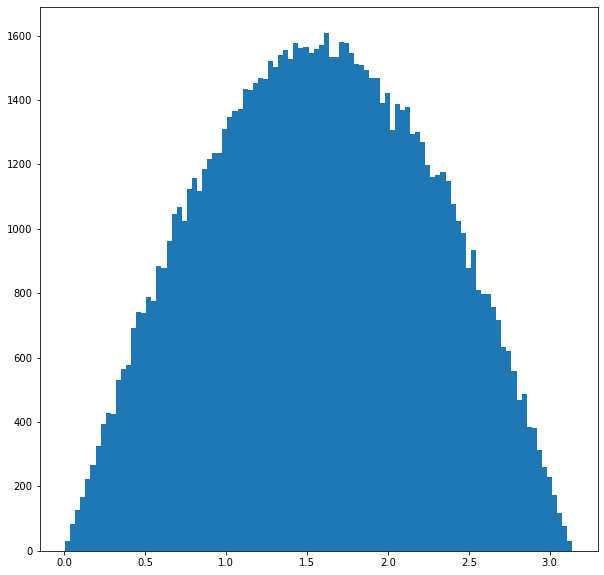

In [20]:
import numpy as np
import scipy as sp
import pylab as pl
import numpy.random as npr

u=npr.uniform(size=100000,low=-1, high=1)
x=np.arccos(u)

pl.hist(x,bins=100);


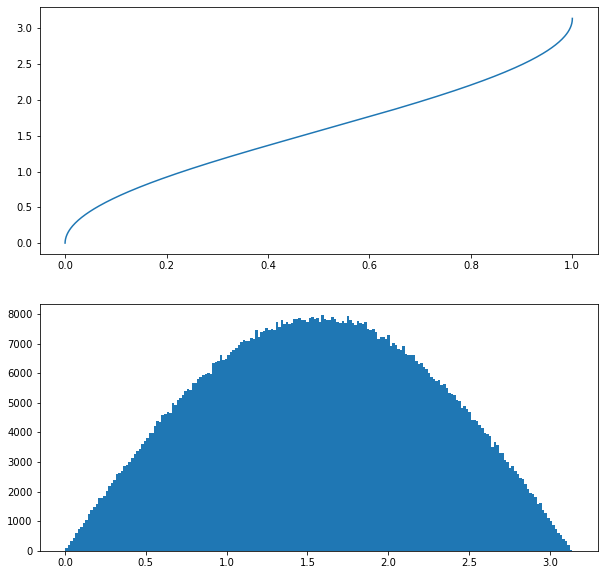

In [21]:
import numpy as np
import scipy as sp
import numpy.random as npr
import pylab as pl
import scipy.interpolate as spi


x=np.arange(0,np.pi,0.01)
y=np.sin(x)
ycum=y.cumsum()
ycum=ycum/ycum[-1]


pl.subplot(2,1,1)
pl.plot(ycum,x)


f= spi.CubicSpline(ycum,x)

yr=npr.uniform(size=1000000)

xr=f(yr)

pl.subplot(2,1,2)
pl.hist(xr,bins=200)

pl.show()

(array([  25.,   62.,   72.,  106.,  135.,  170.,  190.,  231.,  257.,
         290.,  345.,  346.,  383.,  441.,  449.,  473.,  502.,  499.,
         519.,  608.,  585.,  658.,  674.,  631.,  701.,  709.,  782.,
         763.,  774.,  813.,  795.,  834.,  778.,  884.,  880.,  907.,
         918.,  916.,  909.,  910.,  953.,  983.,  969.,  948.,  928.,
        1006., 1012., 1040., 1013.,  999.,  966.,  963.,  969.,  961.,
         942.,  966.,  986.,  972.,  941.,  980.,  979.,  938.,  936.,
         900.,  864.,  858.,  835.,  819.,  836.,  791.,  799.,  779.,
         734.,  744.,  709.,  675.,  631.,  675.,  674.,  612.,  589.,
         594.,  531.,  527.,  475.,  430.,  436.,  356.,  354.,  332.,
         329.,  285.,  221.,  220.,  182.,  169.,  115.,   93.,   66.,
          33.]),
 array([2.83064368e-03, 3.40992449e-02, 6.53678461e-02, 9.66364473e-02,
        1.27905048e-01, 1.59173650e-01, 1.90442251e-01, 2.21710852e-01,
        2.52979453e-01, 2.84248054e-01, 3.15516656e-01, 3.

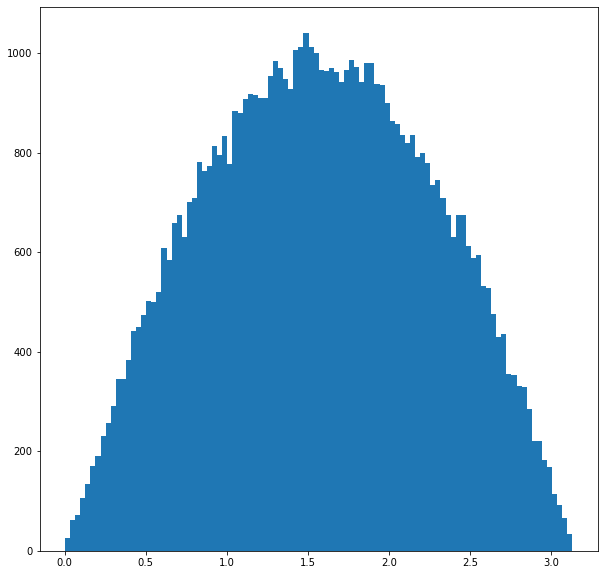

In [22]:
import numpy as np
import scipy as sp
import numpy.random as npr
import pylab as pl
import scipy.interpolate as spi

x=[]

for i in range(100000):
    xr=npr.uniform(low=0,high=np.pi)
    yr=npr.uniform()
    if np.sin(xr) > yr :
        x.append(xr)

pl.hist(x,bins=100)

,Var1,Var2,Var3,Var4,Var5
Var1,2.013266,0.091177,0.301032,0.097356,0.096086
Var2,0.091177,2.999394,0.204611,-0.412539,0.089004
Var3,0.301032,0.204611,0.998627,0.507161,0.199989
Var4,0.097356,-0.412539,0.507161,2.016037,0.503306
Var5,0.096086,0.089004,0.199989,0.503306,2.985265


,Var1,Var2,Var3,Var4,Var5
Var1,1.000000,0.037104,0.212305,0.048324,0.039194
Var2,0.037104,1.000000,0.118225,-0.167764,0.029744
Var3,0.212305,0.118225,1.000000,0.357433,0.115828
Var4,0.048324,-0.167764,0.357433,1.000000,0.205159
Var5,0.039194,0.029744,0.115828,0.205159,1.000000


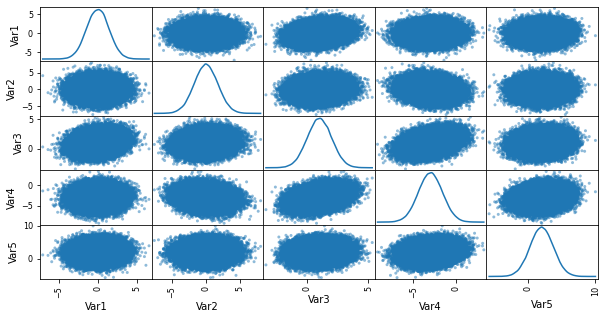

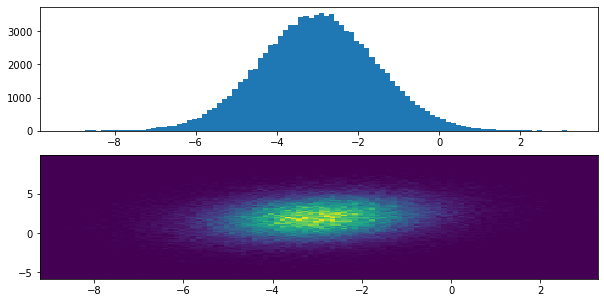

,Var1,Var2,Var3,Var4,Var5,Var6
Var1,1.000000,0.037104,0.212305,0.048324,0.039194,0.064910
Var2,0.037104,1.000000,0.118225,-0.167764,0.029744,0.729676
Var3,0.212305,0.118225,1.000000,0.357433,0.115828,0.347947
Var4,0.048324,-0.167764,0.357433,1.000000,0.205159,0.551688
Var5,0.039194,0.029744,0.115828,0.205159,1.000000,0.167468
Var6,0.064910,0.729676,0.347947,0.551688,0.167468,1.000000


In [23]:
import numpy as np
import numpy.random as npr
import pylab as pl
import scipy as sp
import pandas as pd
import pandas.plotting as pdp
pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size

means = [0,0,1,-3,2] # completely made up means and covariance matrix
cov =[[2,.1,.3,.1,.1],
     [.1,3,.2,-.4,.1],
     [.3,.2,1,0.5,0.2],
     [.1,-.4,0.5,2,.5],
     [.1,.1,0.2,.5,3]]

x=npr.multivariate_normal(means,cov,size=100000)
#print(x)
#print(x[:,0])

df = pd.DataFrame(x,columns=["Var1","Var2","Var3","Var4","Var5"])
#display(df)

display(df.cov())
display(df.corr())

pdp.scatter_matrix(df,diagonal="kde")
pl.show()

pl.figure(2)
pl.subplot(2,1,1)
pl.hist(x[:,3],bins=100)
pl.subplot(2,1,2)
pl.hist2d(x[:,3],x[:,4],bins=100)
pl.show()

# now add the columns together

df["Var6"]=df["Var2"]+df["Var4"]

display(df.corr())